In [37]:
import pandas as pd
from ultralytics import YOLO
from pathlib import Path 

file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent
image_folder = Path('/home/ubuntu/landscape-aesthetics')  


csv_file = project_base_path / 'data' / 'processed' / 'landscape_ob'  / 'previous_version' / 'selected_images_6_to_7.csv'

df = pd.read_csv(csv_file)


model = YOLO('yolov8n.pt')  


df['predicted_objects2'] = ''


for idx, row in df.iterrows():
    
    relative_image_path = row['image_path']  
    image_path = image_folder / relative_image_path  
    
 
    if not image_path.exists():
        print(f"Image not found: {image_path}")
        continue  


    results = model(str(image_path))  
    
    
    predictions = []
    for result in results[0].boxes:  
        class_id = int(result.cls)  
        confidence = float(result.conf)  
        class_name = model.names[class_id]  
        predictions.append(f'{class_name}:{confidence:.2f}')
    
    
    df.at[idx, 'predicted_objects2'] = '; '.join(predictions)


df.to_csv(csv_file, index=False)

print(f"The prediction results have been saved to：{csv_file}")



image 1/1 /home/ubuntu/landscape-aesthetics/data/processed/wikimedia_commons/images/FR/ns6/11135/File:Mont Vorassay (50730454196).jpeg: 640x640 (no detections), 239.3ms
Speed: 2.4ms preprocess, 239.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/ubuntu/landscape-aesthetics/data/processed/wikimedia_commons/images/SE/ns6/2712/File:Rávttasjávri (28152369943).jpeg: 640x640 (no detections), 153.3ms
Speed: 2.1ms preprocess, 153.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/ubuntu/landscape-aesthetics/data/processed/wikimedia_commons/images/FR/ns6/5580/File:Lago Rovina.jpeg: 640x640 (no detections), 154.0ms
Speed: 4.8ms preprocess, 154.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/ubuntu/landscape-aesthetics/data/processed/wikimedia_commons/images/PT/ns6/157/File:Cabo da Roca - panoramio (29).jpeg: 640x640 (no detections), 169.6ms
Speed: 10.6ms preprocess, 169.6ms inference, 

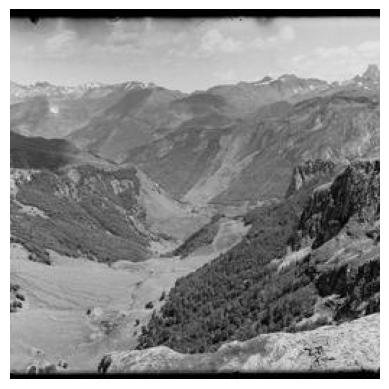

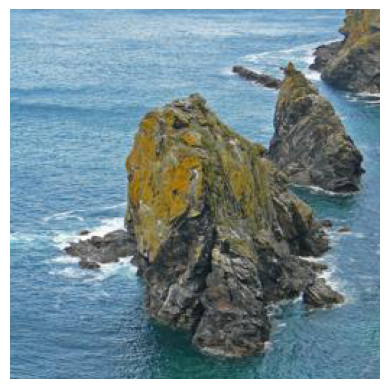

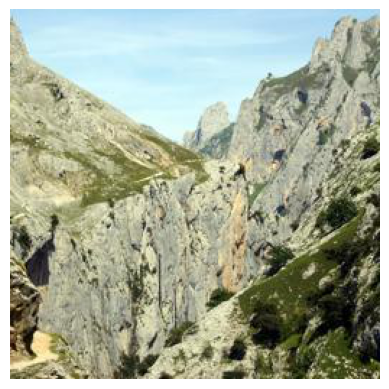

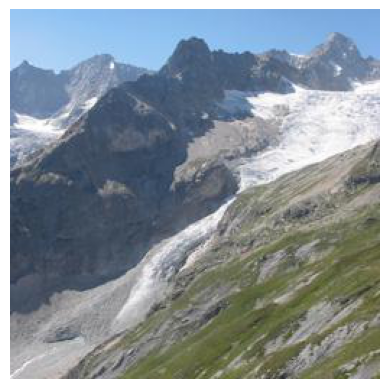

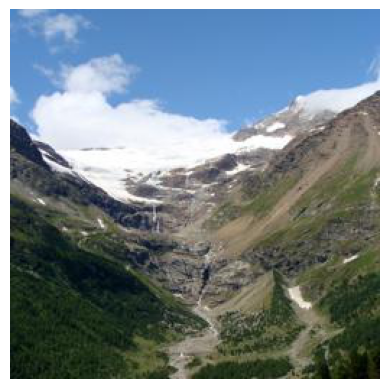

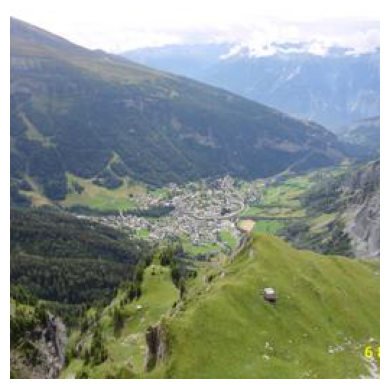

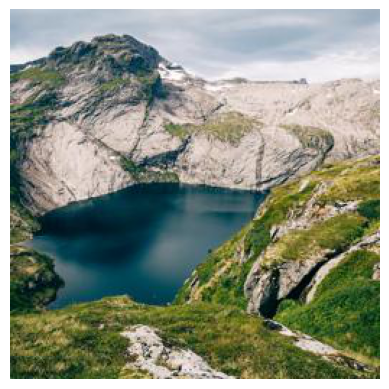

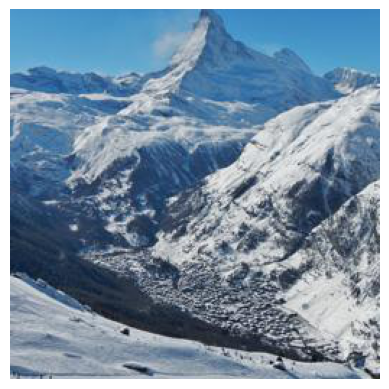

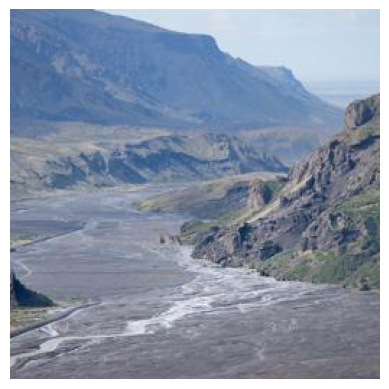

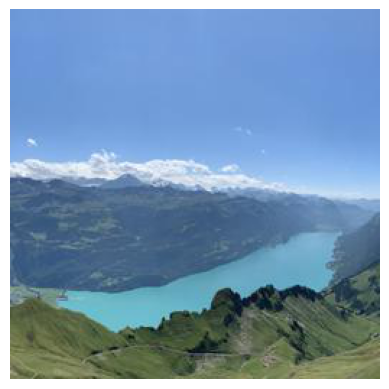

In [5]:
import pandas as pd
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

# 设置路径
file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent
image_folder = Path('/home/ubuntu/landscape-aesthetics')  # 假设图片存储的文件夹

# 加载CSV文件
csv_file = project_base_path /  'data' / 'processed' / 'landscape_ob'  / 'predicted' / 'selected_images_6_to_7.csv'
df = pd.read_csv(csv_file)

# 获取第10到第20张图片的路径
for i in range(40, 50):  
    relative_image_path = df['image_path'].iloc[i]  # 获取第i行的图片路径
    image_path = image_folder / relative_image_path  # 拼接完整的图片路径

    # 检查图片路径是否存在
    if image_path.exists():
        # 打开并显示图片
        image = Image.open(image_path)
        plt.figure()  # 创建一个新的图像窗口
        plt.imshow(image)
        plt.axis('off')  # 关闭坐标轴显示
        plt.show()
    else:
        print(f"图片未找到: {image_path}")


In [38]:
import pandas as pd
from pathlib import Path  # 导入Path类

# 设置路径
file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

# 加载CSV文件
csv_file = project_base_path / 'data' / 'processed' / 'landscape_ob'  /  'previous_version' / 'selected_images_6_to_7.csv'
data = pd.read_csv(csv_file)

# 定义一个函数，将物体类别和置信度解析成字典并合并
def merge_objects(row):
    obj1 = row['predicted_objects']
    obj2 = row['predicted_objects2']
    
    # 定义一个空字典存储合并后的结果
    merged_dict = {}

    # 解析并处理第一列
    if pd.notna(obj1):
        objects1 = obj1.split('; ')
        for obj in objects1:
            category, confidence = obj.split(':')
            merged_dict[category] = max(merged_dict.get(category, 0), float(confidence))  # 选择较高的置信度

    # 解析并处理第二列
    if pd.notna(obj2):
        objects2 = obj2.split('; ')
        for obj in objects2:
            category, confidence = obj.split(':')
            merged_dict[category] = max(merged_dict.get(category, 0), float(confidence))  # 选择较高的置信度
    
    # 将合并结果重新拼接为字符串形式
    merged_objects = '; '.join([f"{key}:{value:.2f}" for key, value in merged_dict.items()])
    return merged_objects

# 使用 apply 函数合并两列
data['combined_objects'] = data.apply(merge_objects, axis=1)

# 设置完整的保存路径，包括文件名
save_path = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'merged_objects.csv'

# 将文件保存到指定路径
data.to_csv(save_path, index=False)

print(f"合并后的CSV文件已保存到: {save_path}")


合并后的CSV文件已保存到: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/merged_objects.csv


In [42]:
import pandas as pd
import re
from pathlib import Path

# 设置路径
file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

# 加载已合并的CSV文件
csv_file = project_base_path /  'data' / 'processed' / 'landscape_ob' /  'previous_version' / 'selected_images_6_to_7.csv'
data = pd.read_csv(csv_file)

# 检查列名是否正确
print(data.columns)

# 定义一个函数，去掉物体名称后面的置信度
def remove_confidence(objects_str):
    if isinstance(objects_str, str):  # 确保是字符串类型
        # 使用正则表达式匹配每个物体名称后面的 ':数字' 部分，并将其去掉
        return re.sub(r':\d+\.\d+', '', objects_str)
    else:
        return objects_str  # 如果不是字符串，直接返回原值

# 确保 'combined_objects' 列存在
if 'predicted_objects' in data.columns:
    # 对 'combined_objects' 列应用函数
    data['filtered_objects'] = data['predicted_objects'].apply(remove_confidence)

    # 保存处理后的数据为新CSV文件
    filtered_csv_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'filtered_objects2.csv'  # 替换为保存路径
    data.to_csv(filtered_csv_file, index=False)

    print(f"过滤后的CSV文件已保存到: {filtered_csv_file}")
else:
    print("Error: 'combined_objects' 列不存在于数据中")


Index(['image_path', 'predicted_score', 'license', 'url', 'predicted_objects',
       'predicted_objects2'],
      dtype='object')
过滤后的CSV文件已保存到: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/filtered_objects2.csv


In [46]:
import pandas as pd
import re
from pathlib import Path

# 设置路径
file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

# 加载已合并的CSV文件
csv_file = project_base_path /  'data' / 'processed' / 'landscape_ob' / 'filtered_objects2.csv'
data = pd.read_csv(csv_file)

# 检查列名是否正确
print(data.columns)

# 定义一个函数，去掉物体名称后面的置信度
def remove_confidence(objects_str):
    if isinstance(objects_str, str):  # 确保是字符串类型
        # 使用正则表达式匹配每个物体名称后面的 ':数字' 部分，并将其去掉
        return re.sub(r':\d+\.\d+', '', objects_str)
    else:
        return objects_str  # 如果不是字符串，直接返回原值

# 确保 'combined_objects' 列存在
if 'predicted_objects' in data.columns:
    # 对 'combined_objects' 列应用函数
    data['filtered_objects'] = data['predicted_objects'].apply(remove_confidence)

    # 删除 'predicted_objects' 和 'predicted_objects2' 列
    data = data.drop(columns=[ 'predicted_objects2'])

    # 保存处理后的数据为新CSV文件
    filtered_csv_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'filtered_objects3.csv'  # 替换为保存路径
    data.to_csv(filtered_csv_file, index=False)

    print(f"过滤后的CSV文件已保存到: {filtered_csv_file}")
else:
    print("Error: 'combined_objects' 列不存在于数据中")


Index(['image_path', 'predicted_score', 'license', 'url', 'predicted_objects',
       'predicted_objects2', 'filtered_objects'],
      dtype='object')
过滤后的CSV文件已保存到: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/filtered_objects3.csv


In [48]:
import pandas as pd
import re
from pathlib import Path

# 设置路径
file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

# 加载已合并的CSV文件
csv_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'filtered_objects3.csv'
data = pd.read_csv(csv_file)

# 检查列名是否正确
print(data.columns)

# 定义一个函数，去掉物体名称后面的置信度
def remove_confidence(objects_str):
    if isinstance(objects_str, str):  # 确保是字符串类型
        # 使用正则表达式匹配每个物体名称后面的 ':数字' 部分，并将其去掉
        return re.sub(r':\d+\.\d+', '', objects_str)
    else:
        return objects_str  # 如果不是字符串，直接返回原值

# 确保 'combined_objects' 列存在
if 'predicted_objects' in data.columns:
    # 对 'combined_objects' 列应用函数
    data['filtered_objects'] = data['predicted_objects'].apply(remove_confidence)

    # 重命名列 'combined_objects' 为 'object_type'，'filtered_objects' 为 'type_summary'
    data = data.rename(columns={
        'predicted_objects': 'object_type',
        'filtered_objects': 'type_summary'
    })

    # 保存处理后的数据为新CSV文件
    renamed_csv_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'filtered_objects5.csv'  # 替换为保存路径
    data.to_csv(renamed_csv_file, index=False)

    print(f"重命名后的CSV文件已保存到: {renamed_csv_file}")
else:
    print("Error: 'combined_objects' 列不存在于数据中")


Index(['image_path', 'predicted_score', 'license', 'url', 'predicted_objects',
       'filtered_objects'],
      dtype='object')
重命名后的CSV文件已保存到: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/filtered_objects5.csv
